# MadMiner particle physics tutorial

# Part 4b: The Fisher information

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d
from madminer.plotting import plot_fisherinfo_barplot
from madminer.fisherinformation import project_information,profile_information
from madminer.plotting import plot_distribution_of_information


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information from a SALLY model

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [3]:
#fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_wb/delphes_data_shuffled.h5')
#fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_1M/delphes_data_shuffled.h5') #only w, no mjj cut
fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_1M_az/delphes_data_shuffled.h5') #with az, with mjj cut
#fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_2M_az/delphes_data_shuffled.h5') #with az, with mjj cut
#fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_1M/delphes_data_shuffled_mjj.h5') #only w, with mjj cut
#fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_wphi2/delphes_data_shuffled_t.h5')
#fisher = FisherInformation('/data_CMS/cms/cortinovis/ewdim6/data_ew_02_100k/delphes_data_shuffled.h5')

#fisher = FisherInformation('dim6/data_1M/delphes_data_shuffled.h5')

#fisher = FisherInformation('/data_CMS/cms/cortinovis/smeftsim/data_sme_wb_100k/delphes_data_shuffled.h5') #solo theta0
#fisher = FisherInformation('/data_CMS/cms/cortinovis/smeftsim/data_sme_hw_hbox/delphes_data_shuffled.h5') #no distances
#fisher = FisherInformation('/data_CMS/cms/cortinovis/smeftsim/data_sme_wwt_100k/delphes_data_shuffled.h5') #solo theta0

#fisher = FisherInformation('data_hel/delphes_data_shuffled.h5') #doesn't work
#fisher = FisherInformation('data_hel_h_hw/delphes_data_shuffled.h5') 
#fisher = FisherInformation('data_hel_h_6/delphes_data_shuffled.h5')
#fisher = FisherInformation('data_hel_hw_hb/delphes_data_shuffled.h5')
#fisher = FisherInformation('data_hel_hwt_hbt/delphes_data_shuffled.h5')
#fisher = FisherInformation('data_hel_w_b/delphes_data_shuffled.h5')


12:29 madminer.analysis.da INFO    Loading data from /data_CMS/cms/cortinovis/ewdim6/data_ew_1M_az/delphes_data_shuffled.h5
12:29 madminer.analysis.da INFO    Found 2 parameters
12:29 madminer.analysis.da INFO    Did not find nuisance parameters
12:29 madminer.analysis.da INFO    Found 6 benchmarks, of which 6 physical
12:29 madminer.analysis.da INFO    Found 18 observables
12:29 madminer.analysis.da INFO    Found 89591 events
12:29 madminer.analysis.da INFO      34607 signal events sampled from benchmark sm
12:29 madminer.analysis.da INFO      17041 signal events sampled from benchmark w
12:29 madminer.analysis.da INFO      15914 signal events sampled from benchmark neg_w
12:29 madminer.analysis.da INFO      11005 signal events sampled from benchmark ww
12:29 madminer.analysis.da INFO      11024 signal events sampled from benchmark neg_ww
12:29 madminer.analysis.da INFO    Found morphing setup with 6 components
12:29 madminer.analysis.da INFO    Did not find nuisance morphing setup


In [4]:
lumi = 10750.*1000. 

This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [5]:
info_sally, _ = fisher.full_information(
    theta=[0.,0.],
    model_file='/data_CMS/cms/cortinovis/ewdim6/models_ew_2M_az/sally',
    luminosity=lumi,
)

print('Fisher information after 300 ifb:\n{}'.format(info_sally))

12:29 madminer.ml.base     INFO    Loading model from /data_CMS/cms/cortinovis/ewdim6/models_ew_2M_az/sally
12:29 madminer.fisherinfor INFO    Found 2 parameters in Score Estimator model, matching 2 physical parameters in MadMiner file
12:29 madminer.fisherinfor INFO    Evaluating rate Fisher information
12:29 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
12:29 madminer.ml.base     INFO    Loading evaluation data
12:29 madminer.ml.base     INFO    Calculating Fisher information


Fisher information after 300 ifb:
[[78.83177467  2.61629541]
 [ 2.61629541 41.64614261]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [6]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="pt_j1",
    bins=[30.,100.,200.,400.],
    histrange=[30.,400.],
)

print('Histogram Fisher information after 300 ifb:\n{}'.format(info_histo_1d))

12:29 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:29 madminer.fisherinfor INFO      Bin 1: (0.00001 +/- 0.00000) fb (26 %)
12:29 madminer.fisherinfor INFO      Bin 2: (0.00179 +/- 0.00008) fb (5 %)
12:29 madminer.fisherinfor INFO      Bin 3: (0.00150 +/- 0.00004) fb (3 %)
12:29 madminer.fisherinfor INFO      Bin 5: (0.00006 +/- 0.00000) fb (2 %)
12:29 madminer.fisherinfor INFO      Bin 4: (0.00047 +/- 0.00001) fb (1 %)


Histogram Fisher information after 300 ifb:
[[4.38781771e+01 5.00876550e-01]
 [5.00876550e-01 1.68633543e-02]]


In [7]:
info_histo_1d_delta_phi_jj, cov_histo_1d_delta_phi_jj = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="delta_phi_jj",
    bins=5,
    histrange=[0,6.2],
)

info_histo_1d_delta_eta_jj, cov_histo_1d_delta_eta_jj = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="delta_eta_jj",
    bins=5,
    histrange=[0,8],
)

info_histo_1d_m_jj, cov_histo_1d_m_jj = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="m_jj",
    bins=5,
    histrange=[0,1000],
)

info_histo_1d_H_pt, cov_histo_1d_H_pt = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="H_pt",
    bins=5,
    histrange=[0,1250],
)

info_histo_1d_Z1_pt, cov_histo_1d_Z1_pt = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="Z1_pt",
    bins=5,
    histrange=[0,600],
)

info_histo_1d_Z2_pt, cov_histo_1d_Z2_pt = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="Z2_pt",
    bins=5,
    histrange=[0,600],
)

info_histo_1d_H_eta, cov_histo_1d_H_eta = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="H_eta",
    bins=5,
    histrange=[0,2.5],
)

info_histo_1d_n_jets, cov_histo_1d_n_jets = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="n_jets",
    bins=5,
    histrange=[2,6],
)

info_histo_1d_met, cov_histo_1d_met = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="met",
    bins=5,
    histrange=[0,70],
)

12:29 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:29 madminer.fisherinfor INFO      Bin 4: (0.00047 +/- 0.00004) fb (8 %)
12:29 madminer.fisherinfor INFO      Bin 3: (0.00073 +/- 0.00004) fb (5 %)
12:29 madminer.fisherinfor INFO      Bin 1: (0.00196 +/- 0.00007) fb (4 %)
12:29 madminer.fisherinfor INFO      Bin 2: (0.00067 +/- 0.00002) fb (3 %)
12:29 madminer.fisherinfor INFO      Bin 7: (0.00000 +/- 0.00000) fb (0 %)
/grid_mnt/vol__vol_U__u/llr/cms/cortinovis/miner/madminer/madminer/fisherinformation/information.py:1183: RuntimeWarning: divide by zero encountered in true_divide
  inv_sigma = sanitize_array(1.0 / sigma)  # Shape (n_events,)
12:29 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:29 madminer.fisherinfor INFO      Bin 7: (0.00009 +/- 0.00001) fb (14 %)
12:29 madminer.fisherinfor INFO      Bin 2: (0.00000 +/- 0.00000) fb (11 %)
12:29 madminer.fisherinfor INFO      Bin 6: (0.00089 +/- 0.00005) fb

In [8]:
info_histo_1d_eta_j1, cov_histo_1d_eta_j1 = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="eta_j1",
    bins=5,
    histrange=[-3,3],
)

info_histo_1d_eta_j2, cov_histo_1d_eta_j2 = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="eta_j2",
    bins=5,
    histrange=[-3,3],
)


info_histo_1d_H_m, cov_histo_1d_H_m = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="H_m",
    bins=5,
    histrange=[115,130],
)



info_histo_1d_Z1_eta, cov_histo_1d_Z1_eta = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="Z1_eta",
    bins=5,
    histrange=[-3,3],
)

info_histo_1d_Z2_eta, cov_histo_1d_Z2_eta = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="Z2_eta",
    bins=5,
    histrange=[-3,3],
)


info_histo_1d_Z2_m, cov_histo_1d_Z2_m = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="Z2_m",
    bins=10,
    histrange=[0,120],
)

info_histo_1d_delta_phi_ZZ, cov_histo_1d_delta_phi_ZZ = fisher.histo_information(
    theta=[0.,0.],
    luminosity=lumi,
    observable="delta_phi_zz",
    bins=5,
    histrange=[0,6.2],
)


12:30 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:30 madminer.fisherinfor INFO      Bin 1: (0.00058 +/- 0.00004) fb (7 %)
12:30 madminer.fisherinfor INFO      Bin 7: (0.00081 +/- 0.00006) fb (7 %)
12:30 madminer.fisherinfor INFO      Bin 3: (0.00045 +/- 0.00003) fb (7 %)
12:30 madminer.fisherinfor INFO      Bin 4: (0.00010 +/- 0.00001) fb (6 %)
12:30 madminer.fisherinfor INFO      Bin 2: (0.00084 +/- 0.00004) fb (5 %)
12:31 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:31 madminer.fisherinfor INFO      Bin 4: (0.00002 +/- 0.00000) fb (8 %)
12:31 madminer.fisherinfor INFO      Bin 2: (0.00075 +/- 0.00005) fb (7 %)
12:31 madminer.fisherinfor INFO      Bin 6: (0.00064 +/- 0.00004) fb (7 %)
12:31 madminer.fisherinfor INFO      Bin 5: (0.00012 +/- 0.00001) fb (5 %)
12:31 madminer.fisherinfor INFO      Bin 3: (0.00019 +/- 0.00001) fb (5 %)
12:31 madminer.fisherinfor INFO    Bins with largest statistical uncerta

We can do the same thing in 2D:

In [9]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=lumi,
    observable1="pt_j1",
    bins1=[30.,100.,200.,400.],
    histrange1=[30.,400.],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0,6.2],
)

print('Histogram Fisher information after 300 ifb:\n{}'.format(info_histo_2d))

#if it doesn't work for ggh, it's because of nan values

12:32 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:32 madminer.fisherinfor INFO      Bin (1, 4): (0.00000 +/- 0.00000) fb (69 %)
12:32 madminer.fisherinfor INFO      Bin (1, 3): (0.00000 +/- 0.00000) fb (56 %)
12:32 madminer.fisherinfor INFO      Bin (1, 1): (0.00001 +/- 0.00000) fb (29 %)
12:32 madminer.fisherinfor INFO      Bin (1, 2): (0.00000 +/- 0.00000) fb (20 %)
12:32 madminer.fisherinfor INFO      Bin (2, 4): (0.00020 +/- 0.00003) fb (14 %)


Histogram Fisher information after 300 ifb:
[[46.57059708  0.77829773]
 [ 0.77829773 21.90315895]]


In [10]:
info_histo_2d_H_pt_Z1_pt, cov_histo_2d_H_pt_Z1_pt = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=lumi,
    observable1="H_pt",
    bins1=5,
    histrange1=[0,1250],
    observable2="Z1_pt",
    bins2=5,
    histrange2=[0,600],
)


info_histo_2d_delta_phi_jj_H_pt, cov_histo_2d_delta_phi_jj_H_pt = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=lumi,
    observable1="H_pt",
    bins1=5,
    histrange1=[0,1250],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0,6.2],
)

info_histo_2d_H_pt_pt_j1, cov_histo_2d_H_pt_pt_j1 = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=lumi,
    observable1="H_pt",
    bins1=5,
    histrange1=[0,1250],
    observable2="pt_j1",
    bins2=[30.,100.,200.,400.],
    histrange2=[30.,400.],
)

12:32 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:32 madminer.fisherinfor INFO      Bin (2, 4): (0.00000 +/- 0.00000) fb (100 %)
12:32 madminer.fisherinfor INFO      Bin (4, 2): (0.00000 +/- 0.00000) fb (51 %)
12:32 madminer.fisherinfor INFO      Bin (7, 6): (0.00000 +/- 0.00000) fb (47 %)
12:32 madminer.fisherinfor INFO      Bin (5, 2): (0.00000 +/- 0.00000) fb (46 %)
12:32 madminer.fisherinfor INFO      Bin (5, 3): (0.00000 +/- 0.00000) fb (37 %)
12:32 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
12:32 madminer.fisherinfor INFO      Bin (7, 3): (0.00000 +/- 0.00000) fb (72 %)
12:32 madminer.fisherinfor INFO      Bin (7, 1): (0.00000 +/- 0.00000) fb (52 %)
12:32 madminer.fisherinfor INFO      Bin (6, 2): (0.00000 +/- 0.00000) fb (37 %)
12:32 madminer.fisherinfor INFO      Bin (5, 4): (0.00000 +/- 0.00000) fb (28 %)
12:32 madminer.fisherinfor INFO      Bin (7, 2): (0.00000 +/- 0.00000) fb (25 %)
12:32 madmi

## 2. Calculating the Fisher information from a SALLY model

We can also calculate the Fisher Information using an ALICES model

In [11]:
info_alices, _ = fisher.full_information(
    theta=[0.,0.],
    model_file='/data_CMS/cms/cortinovis/ewdim6/models_ew_2M_az/alices',
    luminosity=lumi,
)

print('Fisher information using ALICES after 300 ifb:\n{}'.format(info_alices))

12:32 madminer.ml.base     INFO    Loading model from /data_CMS/cms/cortinovis/ewdim6/models_ew_2M_az/alices
12:32 madminer.fisherinfor INFO    Found 2 parameters in Parameterized Ratio Estimator model, matching 2 physical parameters in MadMiner file
12:32 madminer.fisherinfor INFO    Evaluating rate Fisher information
12:32 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
12:32 madminer.ml.base     INFO    Loading evaluation data
12:32 madminer.ml.base     INFO    Calculating Fisher information


Fisher information using ALICES after 300 ifb:
[[42.74502705  0.48555735]
 [ 0.48555735 20.82511895]]


In [12]:
fi_rate, _ = fisher.rate_information(
    theta=[0.,0.],
    luminosity=lumi,
)

print('Fisher information using rate after 300 ifb:\n{}'.format(fi_rate))

Fisher information using rate after 300 ifb:
[[ 1.49847105e+01 -9.32569075e-03]
 [-9.32569075e-03  5.80381637e-06]]


In [13]:
fi_full, _ = fisher.truth_information(
    theta=[0.,0.],
    luminosity=lumi,
    #cuts = ['isZZcand == 1','n_jets >= 2','pt_j1 > 20.']
)

print('Fisher information using full after 300 ifb:\n{}'.format(fi_full))

Fisher information using full after 300 ifb:
[[74.92759541  1.64157815]
 [ 1.64157815 49.71132286]]


full 61.00864781233674
1D: pt_j1 0.6993253364832154
1D: delta_phi_jj 13.695499443968437
1D: delta_eta_jj 1.6188015249084016
1D: H_pt 4.936679277148085
1D: Z1_pt 1.3825323947823835
1D: Z2_pt 0.7001940584919923
1D: H_eta 0.3362365015184248
1D: n_jets 0.6600981368509261
1D: met 0.4230967891768985
2D: pt_j1, delta_phi_jj 31.92863045929778
2D: delta_phi_jj, H_pt 36.76246650931445
2D: H_pt, Z1_pt 5.9330902618935255
2D: H_pt, pt_j1 5.099746432009118


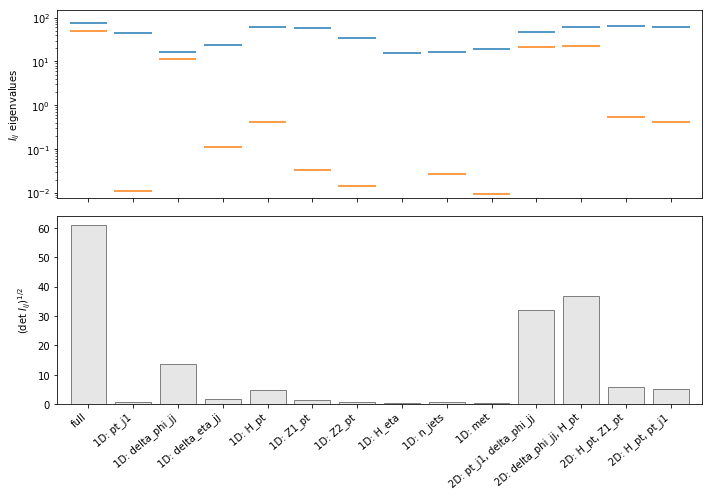

In [14]:
#list_of_fi=[fi_full, fi_rate, info_sally,info_alices,info_histo_1d,info_histo_1d_delta_phi_jj, info_histo_1d_delta_eta_jj, info_histo_1d_m_jj, info_histo_1d_H_pt, info_histo_1d_Z1_pt, info_histo_1d_Z2_pt, info_histo_1d_H_eta, info_histo_1d_n_jets, info_histo_1d_met,info_histo_2d, info_histo_2d_delta_phi_jj_H_pt, info_histo_2d_H_pt_Z1_pt, info_histo_2d_H_pt_pt_j1]
#list_of_labels=["full", "rate", "sally", "alices","1D: pt_j1","1D: delta_phi_jj", "1D: delta_eta_jj", "1D: m_jj", "1D: H_pt", "1D: Z1_pt", "1D: Z2_pt", "1D: H_eta", "1D: n_jets", "1D: met","2D: pt_j1, delta_phi_jj", "2D: delta_phi_jj, H_pt", "2D: H_pt, Z1_pt", "2D: H_pt, pt_j1"] 


list_of_fi=[fi_full,info_histo_1d,info_histo_1d_delta_phi_jj, info_histo_1d_delta_eta_jj, info_histo_1d_H_pt, info_histo_1d_Z1_pt, info_histo_1d_Z2_pt, info_histo_1d_H_eta, info_histo_1d_n_jets, info_histo_1d_met,info_histo_2d, info_histo_2d_delta_phi_jj_H_pt, info_histo_2d_H_pt_Z1_pt, info_histo_2d_H_pt_pt_j1]
list_of_labels=["full","1D: pt_j1","1D: delta_phi_jj", "1D: delta_eta_jj", "1D: H_pt", "1D: Z1_pt", "1D: Z2_pt", "1D: H_eta", "1D: n_jets", "1D: met","2D: pt_j1, delta_phi_jj", "2D: delta_phi_jj, H_pt", "2D: H_pt, Z1_pt", "2D: H_pt, pt_j1"] 

barplot = plot_fisherinfo_barplot(
    fisher_information_matrices=list_of_fi,
    labels=list_of_labels
)

1D: delta_phi_jj 13.695499443968437
1D: H_pt 4.936679277148085
1D: delta_eta_jj 1.6188015249084016
1D: Z1_pt 1.3825323947823835
1D: m_jj 0.14959429760858506
1D: Z2_pt 0.7001940584919923
1D: pt_j1 0.6993253364832154
1D: H_eta 0.3362365015184248
1D: n_jets 0.6600981368509261
1D: met 0.4230967891768985
1D: eta_j1 0.46912339507482603
1D: eta_j2 0.5218882630909769
1D: H_m 0.4270778599071238
1D: Z1_eta 0.167367389067617
1D: Z2_eta 0.24460859845875185
1D: Z2_m 0.24777093877141593
1D: delta_phi_zz 0.4705470547671523


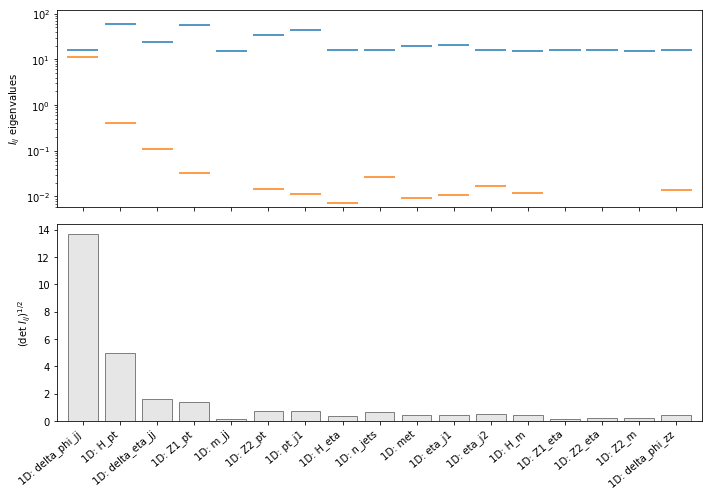

In [16]:
list_of_fi=[info_histo_1d_delta_phi_jj, info_histo_1d_H_pt,info_histo_1d_delta_eta_jj, info_histo_1d_Z1_pt, info_histo_1d_m_jj, info_histo_1d_Z2_pt, info_histo_1d, info_histo_1d_H_eta, info_histo_1d_n_jets, info_histo_1d_met, info_histo_1d_eta_j1, info_histo_1d_eta_j2, info_histo_1d_H_m, info_histo_1d_Z1_eta, info_histo_1d_Z2_eta, info_histo_1d_Z2_m, info_histo_1d_delta_phi_ZZ]
list_of_labels=["1D: delta_phi_jj", "1D: H_pt", "1D: delta_eta_jj", "1D: Z1_pt", "1D: m_jj", "1D: Z2_pt", "1D: pt_j1", "1D: H_eta", "1D: n_jets", "1D: met", "1D: eta_j1", "1D: eta_j2", "1D: H_m", "1D: Z1_eta", "1D: Z2_eta", "1D: Z2_m", "1D: delta_phi_zz", ] 


#list_of_fi=[fi_full,info_histo_1d,info_histo_1d_delta_phi_jj, info_histo_1d_delta_eta_jj, info_histo_1d_H_pt, info_histo_1d_Z1_pt, info_histo_1d_Z2_pt, info_histo_1d_H_eta, info_histo_1d_n_jets, info_histo_1d_met,info_histo_2d, info_histo_2d_delta_phi_jj_H_pt, info_histo_2d_H_pt_Z1_pt, info_histo_2d_H_pt_pt_j1]
#list_of_labels=["full","1D: pt_j1","1D: delta_phi_jj", "1D: delta_eta_jj", "1D: H_pt", "1D: Z1_pt", "1D: Z2_pt", "1D: H_eta", "1D: n_jets", "1D: met","2D: pt_j1, delta_phi_jj", "2D: delta_phi_jj, H_pt", "2D: H_pt, Z1_pt", "2D: H_pt, pt_j1"] 

barplot = plot_fisherinfo_barplot(
    fisher_information_matrices=list_of_fi,
    labels=list_of_labels
)

## 3. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

luminosity:  10750.0  ifb
ewdim6/models_ew_1M_az/


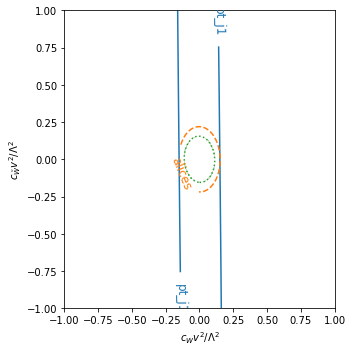

In [71]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [info_histo_1d, info_alices,info_sally],
    [None, None, cov_histo_1d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["pt_j1", "alices", "sally"],
    #xrange=(-0.25,0.25),
    #yrange=(-0.2,0.2)
    xlabel=r'$c_{W} v^2 / \Lambda^2$',
    ylabel=r'$c_{\tilde{W}} v^2 / \Lambda^2$',
)

print('luminosity: ', lumi/1000, ' ifb')
print('ewdim6/models_ew_1M_az/')

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


luminosity:  10750.0  ifb
ewdim6/models_ew_1M_az/


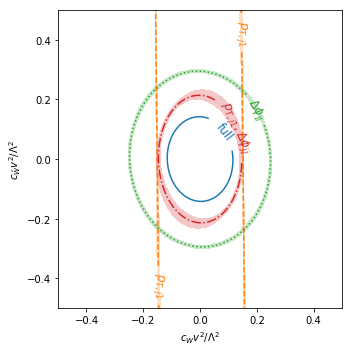

In [14]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, info_histo_1d, info_histo_1d_delta_phi_jj, info_histo_2d],
    [None, cov_histo_1d, cov_histo_1d_delta_phi_jj, cov_histo_2d_delta_phi_jj_H_pt],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "$p_{T,j1}$", "$\Delta \phi_{jj}$", "$p_{T,j1}$, $\Delta \phi_{jj}$ "],
    xrange=(-0.5,0.5),
    yrange=(-0.5,0.5),
    xlabel=r'$c_{W} v^2 / \Lambda^2$',
    ylabel=r'$c_{\tilde{W}} v^2 / \Lambda^2$',
)

print('luminosity: ', lumi/1000, ' ifb')
print('ewdim6/models_ew_1M_az/')

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


luminosity:  3000.0  ifb
ewdim6/models_ew_1M/


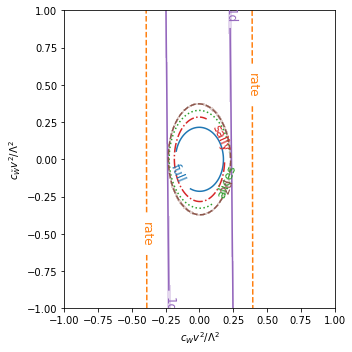

In [36]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    #xrange=(-0.25,0.25),
    #yrange=(-0.2,0.2)
    xlabel=r'$c_{W} v^2 / \Lambda^2$',
    ylabel=r'$c_{\tilde{W}} v^2 / \Lambda^2$',
)

print('luminosity: ', lumi/1000, ' ifb')
print('ewdim6/models_ew_1M/')

luminosity:  3000.0  ifb
ewdim6/models_ew_1M/ m_jj


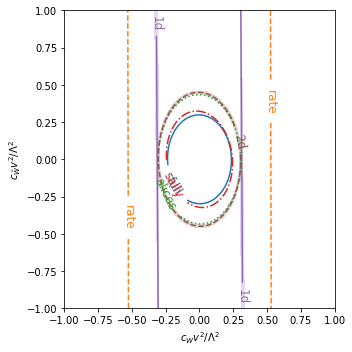

In [49]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    #xrange=(-0.25,0.25),
    #yrange=(-0.2,0.2)
    xlabel=r'$c_{W} v^2 / \Lambda^2$',
    ylabel=r'$c_{\tilde{W}} v^2 / \Lambda^2$',
)

print('luminosity: ', lumi/1000, ' ifb')
print('ewdim6/models_ew_1M/', 'm_jj')

luminosity:  3000.0  ifb
ewdim6/data_ew_wb


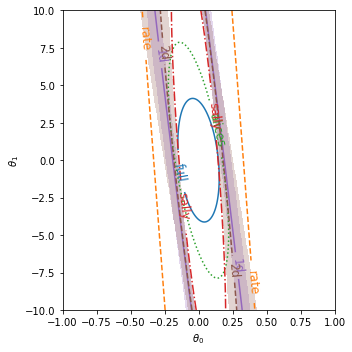

In [304]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None,None,None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-1,1),
    yrange=(-10,10)
)

print('luminosity: ', lumi/1000, ' ifb')
print('ewdim6/data_ew_wb')

luminosity:  30000.0  ifb
ewdim6/data_ew_02_100k


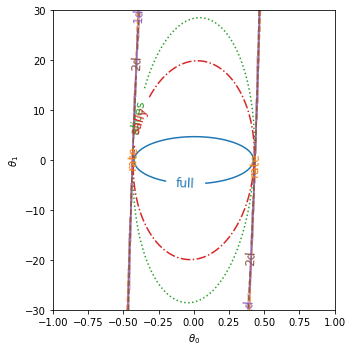

In [377]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-1,1),
    yrange=(-30,30)
)

print('luminosity: ', lumi/1000, ' ifb')
print('ewdim6/data_ew_02_100k')

luminosity:  4000.0  ifb
/data_CMS/cms/cortinovis/ewdim6/models_ew_wphi2/


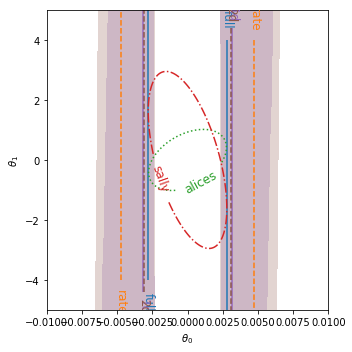

In [187]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-0.01,0.01),
    yrange=(-5,5)
)

print('luminosity: ', lumi/1000, ' ifb')
print('/data_CMS/cms/cortinovis/ewdim6/models_ew_wphi2/')


luminosity:  30000.0  ifb
dim6/data_1M
problem with full fisher info


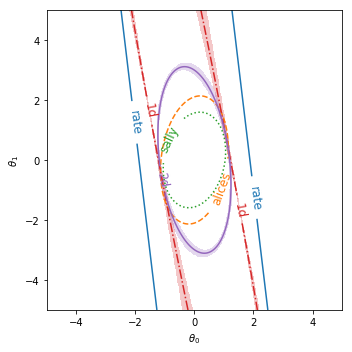

In [291]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["rate", "alices", "sally","1d", "2d"],
    xrange=(-5,5),
    yrange=(-5,5)
)

print('luminosity: ', lumi/1000, ' ifb')
print('dim6/data_1M')
#[b'FW' b'FWW']
print('problem with full fisher info')


luminosity:  30000.0  ifb
/data_CMS/cms/cortinovis/smeftsim/models_sme_wb_100k


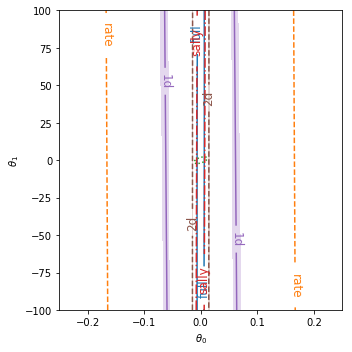

In [326]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-0.25,0.25),
    yrange=(-100,100)
)

print('luminosity: ', lumi/1000, ' ifb')
print('/data_CMS/cms/cortinovis/smeftsim/models_sme_wb_100k')

luminosity:  3000.0  ifb
/data_CMS/cms/cortinovis/smeftsim/models_sme_hw_hbox


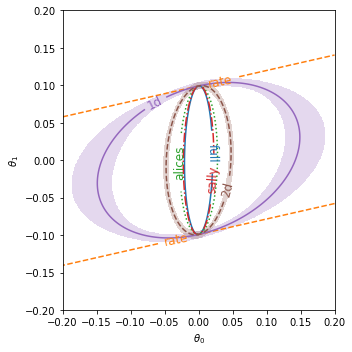

In [103]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-0.2,0.2),
    yrange=(-0.2,0.2)
)

print('luminosity: ', lumi/1000, ' ifb')
print('/data_CMS/cms/cortinovis/smeftsim/models_sme_hw_hbox')

luminosity:  30000.0  ifb
/data_CMS/cms/cortinovis/smeftsim/models_sme_wwt_100k


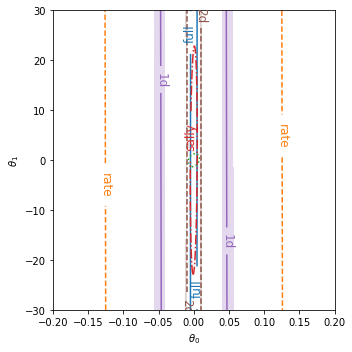

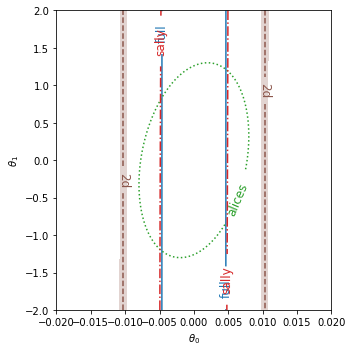

In [358]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-0.2,0.2),
    yrange=(-30,30)
)

_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-0.02,0.02),
    yrange=(-2,2)
)

print('luminosity: ', lumi/1000, ' ifb')
print('/data_CMS/cms/cortinovis/smeftsim/models_sme_wwt_100k')


luminosity:  3000.0  ifb
data_hel_h_hw


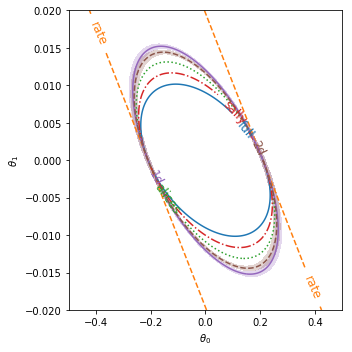

In [30]:
_ = plot_fisher_information_contours_2d(
    #[fi_full, fi_rate, info_histo_1d, info_histo_2d],
    [fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, None, None, cov_histo_1d, cov_histo_2d],
    #inline_labels=["full","rate", "1d", "2d"],
    inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    xrange=(-0.5,0.5),
    yrange=(-0.02,0.02)
)


print('luminosity: ', lumi/1000, ' ifb')
print('data_hel_h_hw')

###### 

luminosity:  3000.0  ifb
data_hel_h_6


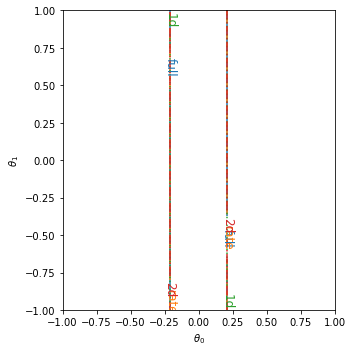

In [50]:
_ = plot_fisher_information_contours_2d(
    [fi_full, fi_rate, info_histo_1d, info_histo_2d],
    #[fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, cov_histo_1d, cov_histo_2d],
    inline_labels=["full","rate", "1d", "2d"],
    #inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    #xrange=(-0.5,0.5),
    #yrange=(-0.02,0.02)
)


print('luminosity: ', lumi/1000, ' ifb')
print('data_hel_h_6')

/grid_mnt/vol__vol_U__u/llr/cms/cortinovis/miner/madminer/madminer/plotting/fisherinformation.py:168: RuntimeWarning: invalid value encountered in sqrt
  uncertainties = (var ** 0.5).reshape((resolution, resolution))
/grid_mnt/vol__vol_U__u/llr/cms/cortinovis/miner/madminer/madminer/plotting/fisherinformation.py:185: RuntimeWarning: invalid value encountered in greater
  band = (d2_up > d2_threshold) * (d2_down < d2_threshold) + (d2_up < d2_threshold) * (d2_down > d2_threshold)
/grid_mnt/vol__vol_U__u/llr/cms/cortinovis/miner/madminer/madminer/plotting/fisherinformation.py:185: RuntimeWarning: invalid value encountered in less
  band = (d2_up > d2_threshold) * (d2_down < d2_threshold) + (d2_up < d2_threshold) * (d2_down > d2_threshold)
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


luminosity:  3000.0  ifb
data_hel_hwt_hbt


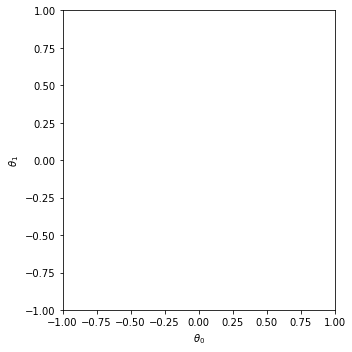

In [62]:
_ = plot_fisher_information_contours_2d(
    [fi_full, fi_rate, info_histo_1d],
    #[fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, cov_histo_1d],
    inline_labels=["full","rate", "1d"],
    #inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    #xrange=(-0.5,0.5),
    #yrange=(-0.02,0.02)
)


print('luminosity: ', lumi/1000, ' ifb')
print('data_hel_hw_hb')

luminosity:  3000.0  ifb
data_hel_hwt_hbt


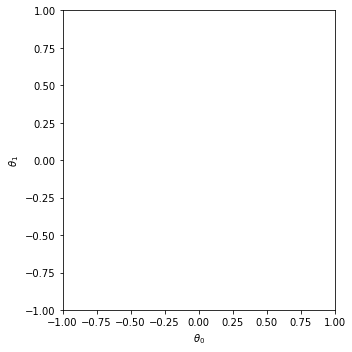

In [72]:
_ = plot_fisher_information_contours_2d(
    [fi_full, fi_rate, info_histo_1d],
    #[fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, cov_histo_1d],
    inline_labels=["full","rate", "1d"],
    #inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    #xrange=(-0.5,0.5),
    #yrange=(-0.02,0.02)
)


print('luminosity: ', lumi/1000, ' ifb')
print('data_hel_hwt_hbt')

In [ ]:
_ = plot_fisher_information_contours_2d(
    [fi_full, fi_rate, info_histo_1d],
    #[fi_full, fi_rate, info_alices, info_sally, info_histo_1d, info_histo_2d],
    [None, None, cov_histo_1d],
    inline_labels=["full","rate", "1d"],
    #inline_labels=["full", "rate", "alices", "sally","1d", "2d"],
    #xrange=(-0.5,0.5),
    #yrange=(-0.02,0.02)
)


print('luminosity: ', lumi/1000, ' ifb')
print('data_hel_w_b')

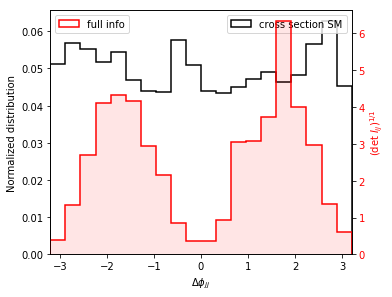

In [15]:
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = fisher.histogram_of_fisher_information(
    theta=np.array([0,0]),
    luminosity=lumi,
    observable='delta_phi_jj',
    nbins=20,
    histrange=(-3.2,3.2),
    cuts=[],
    efficiency_functions=[]
)

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[1]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[1]) for i in range(0,len(fi_histo_full))] 

histoplot = plot_distribution_of_information(
    xbins=bins_histo, 
    xsecs=w_in_histo,
    fisher_information_matrices=proj_fi_histo_full, 
    #fisher_information_matrices_aux=proj_fi_histo_rate,
    xlabel="$\Delta \phi_{jj}$",
    xmin=-3.2,
    xmax=3.2,
    log_xsec=False,
    norm_xsec=True
)

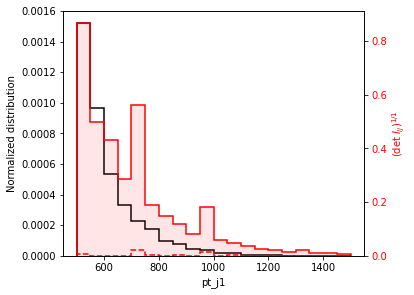

In [204]:
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = fisher.histogram_of_fisher_information(
    theta=np.array([0,0]),
    luminosity=lumi,
    observable='pt_j1',
    nbins=20,
    histrange=(500,1500),
    cuts=[],
    efficiency_functions=[]
)

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[1]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[1]) for i in range(0,len(fi_histo_full))] 

histoplot = plot_distribution_of_information(
    xbins=bins_histo, 
    xsecs=w_in_histo,
    fisher_information_matrices=proj_fi_histo_full, 
    fisher_information_matrices_aux=proj_fi_histo_rate,
    xlabel="pt_j1",
    log_xsec=False,
    norm_xsec=True
)